# Seaborn Master Notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Global Seaborn Settings (Best Practice)


In [2]:

sns.set_theme(style="whitegrid")



## 1. WHY SEABORN IN ML?
- Built on top of Matplotlib
- Works directly with Pandas DataFrames
- Best for statistical visualization & EDA (Exploratory Data Analysis)
- Automatically handles:
    - Grouping
    - Aggregation
    - Confidence intervals
    - Categorical plotting

## 2. SAMPLE DATASETS (Seaborn Built-in)


In [3]:
# Load commonly used datasets
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")

In [4]:
# Inspect datasets
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# 3. RELATIONAL PLOTS (Numerical vs Numerical)
## Use Case:
- Relationship between two numerical variables
- Trend, correlation, time-series


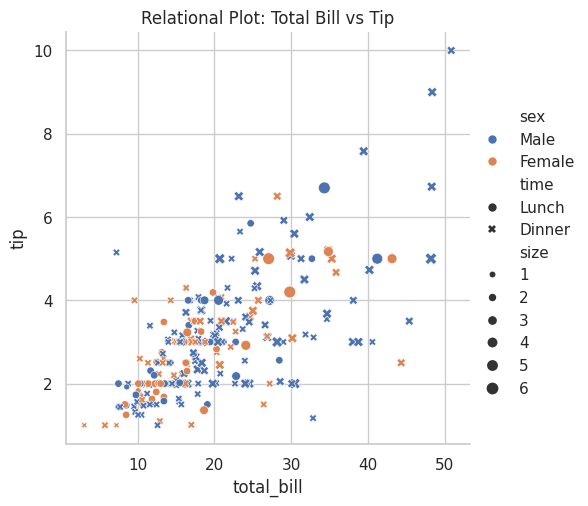

In [7]:


# relplot: High-level API for scatter & line
sns.relplot(
    data=tips,
    x="total_bill",      # numerical
    y="tip",             # numerical
    hue="sex",           # categorical grouping
    style="time",
    size="size",
    kind="scatter"
)
plt.title("Relational Plot: Total Bill vs Tip")
plt.show()

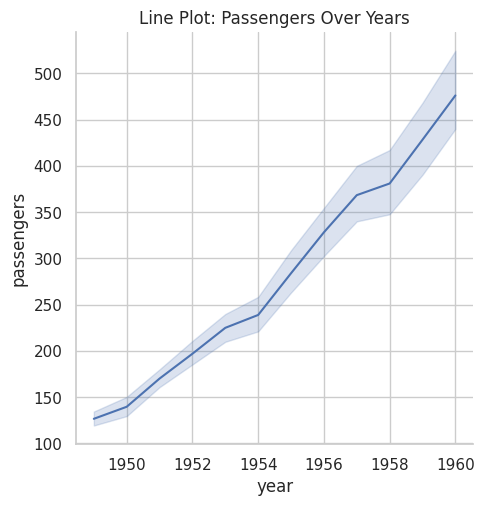

In [8]:

# Line relational plot (time series)
sns.relplot(
    data=flights,
    x="year",
    y="passengers",
    kind="line"
)
plt.title("Line Plot: Passengers Over Years")
plt.show()

# 4. SCATTER PLOT (Low-level)
## Use Case:
- Direct control over scatter

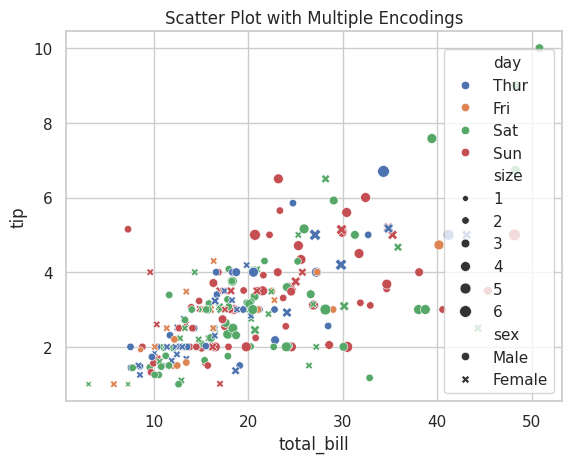

In [9]:
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="day",
    size="size",
    style="sex"
)
plt.title("Scatter Plot with Multiple Encodings")
plt.show()

# 5. LINE PLOT
## Use Case:
- Time series
- Trends with confidence interval

/tmp/ipython-input-1262746799.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


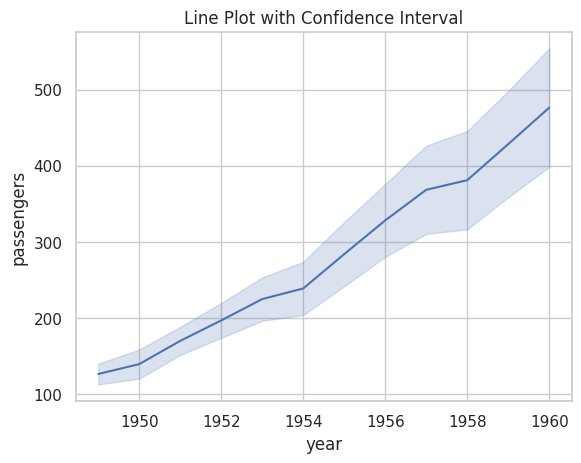

In [10]:
sns.lineplot(
    data=flights,
    x="year",
    y="passengers",
    ci="sd"             # confidence interval
)
plt.title("Line Plot with Confidence Interval")
plt.show()


In [11]:

# 6. CATEGORICAL PLOTS (Categorical vs Numerical)
## Core plots for EDA in ML

### 6.1 Bar Plot (Mean estimator)

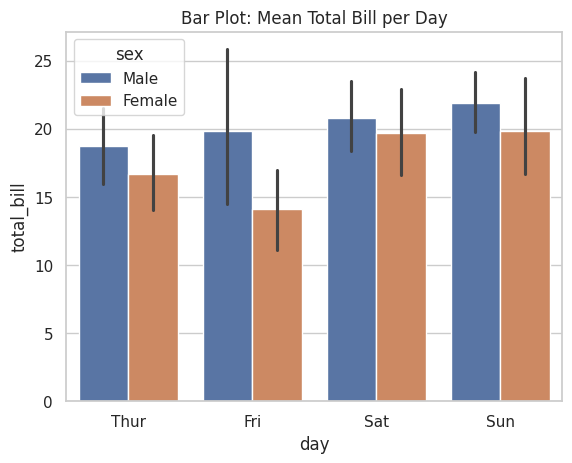

In [12]:

sns.barplot(
    data=tips,
    x="day",            # categorical
    y="total_bill",    # numerical
    hue="sex",
    estimator=np.mean
)
plt.title("Bar Plot: Mean Total Bill per Day")
plt.show()

### 6.2 Count Plot (Frequency of categories)


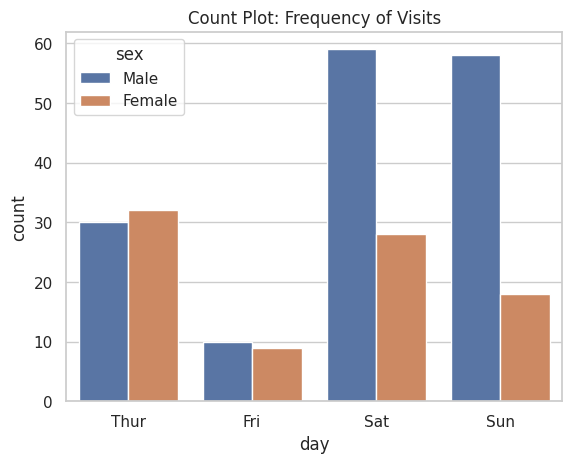

In [13]:

sns.countplot(
    data=tips,
    x="day",
    hue="sex"
)
plt.title("Count Plot: Frequency of Visits")
plt.show()


### 6.3 Box Plot (Distribution + Outliers)


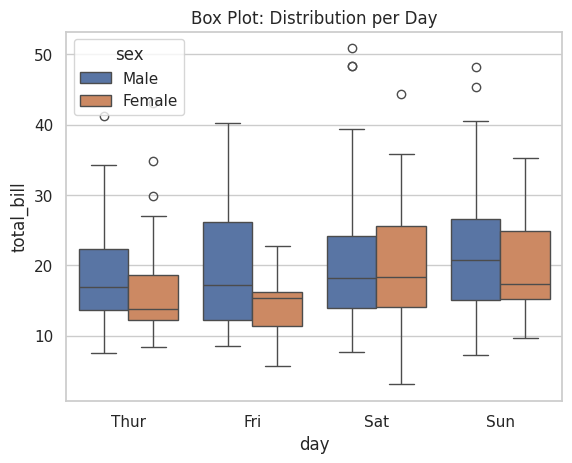

In [14]:




sns.boxplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex"
)
plt.title("Box Plot: Distribution per Day")
plt.show()


### 6.4 Violin Plot (Density + Distribution)


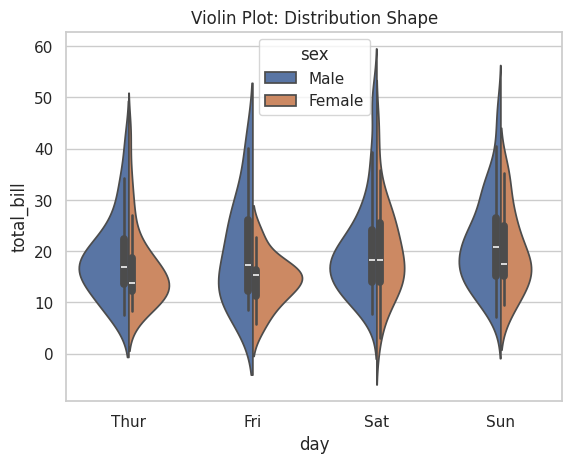

In [15]:

sns.violinplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    split=True
)
plt.title("Violin Plot: Distribution Shape")
plt.show()

### 6.5 Strip Plot (Individual observations)


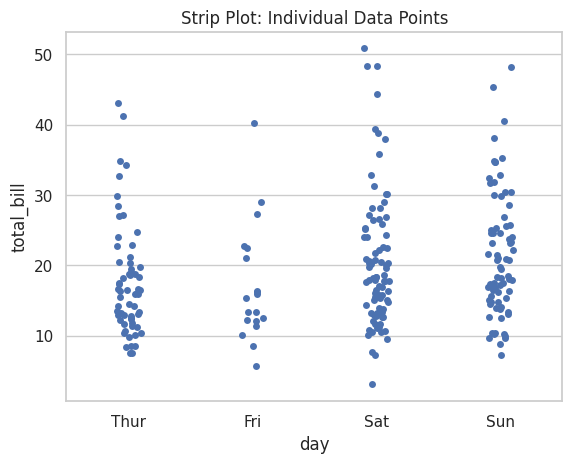

In [16]:

sns.stripplot(
    data=tips,
    x="day",
    y="total_bill",
    jitter=True
)
plt.title("Strip Plot: Individual Data Points")
plt.show()

### 6.6 Swarm Plot (Non-overlapping points)


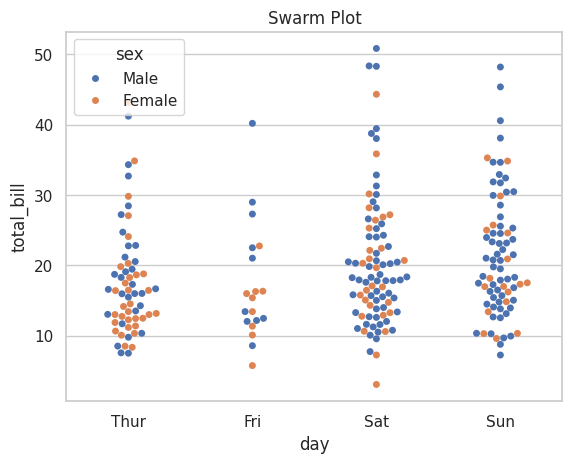

In [17]:
sns.swarmplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex"
)
plt.title("Swarm Plot")
plt.show()

# 7. DISTRIBUTION PLOTS (Single & Two Variables)

#### 7.1 Histogram + KDE


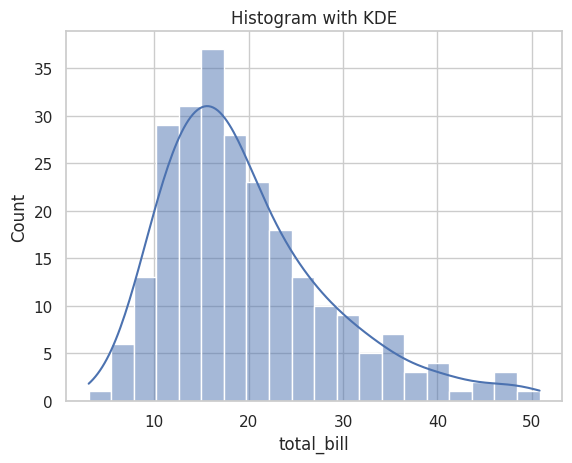

In [18]:
sns.histplot(
    data=tips,
    x="total_bill",
    bins=20,
    kde=True
)
plt.title("Histogram with KDE")
plt.show()

#### 7.2 KDE Plot (Density only)

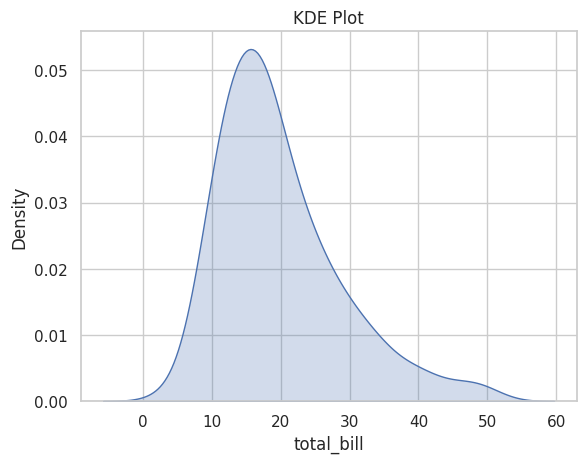

In [19]:
sns.kdeplot(
    data=tips,
    x="total_bill",
    fill=True
)
plt.title("KDE Plot")
plt.show()

#### 7.3 Joint Plot (Two numerical distributions)

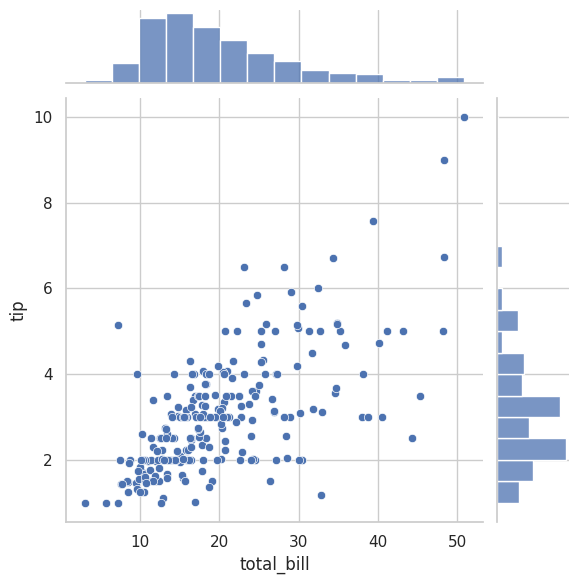

In [20]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="scatter"
)
plt.show()

#### 7.4 Pair Plot (All numerical relationships)

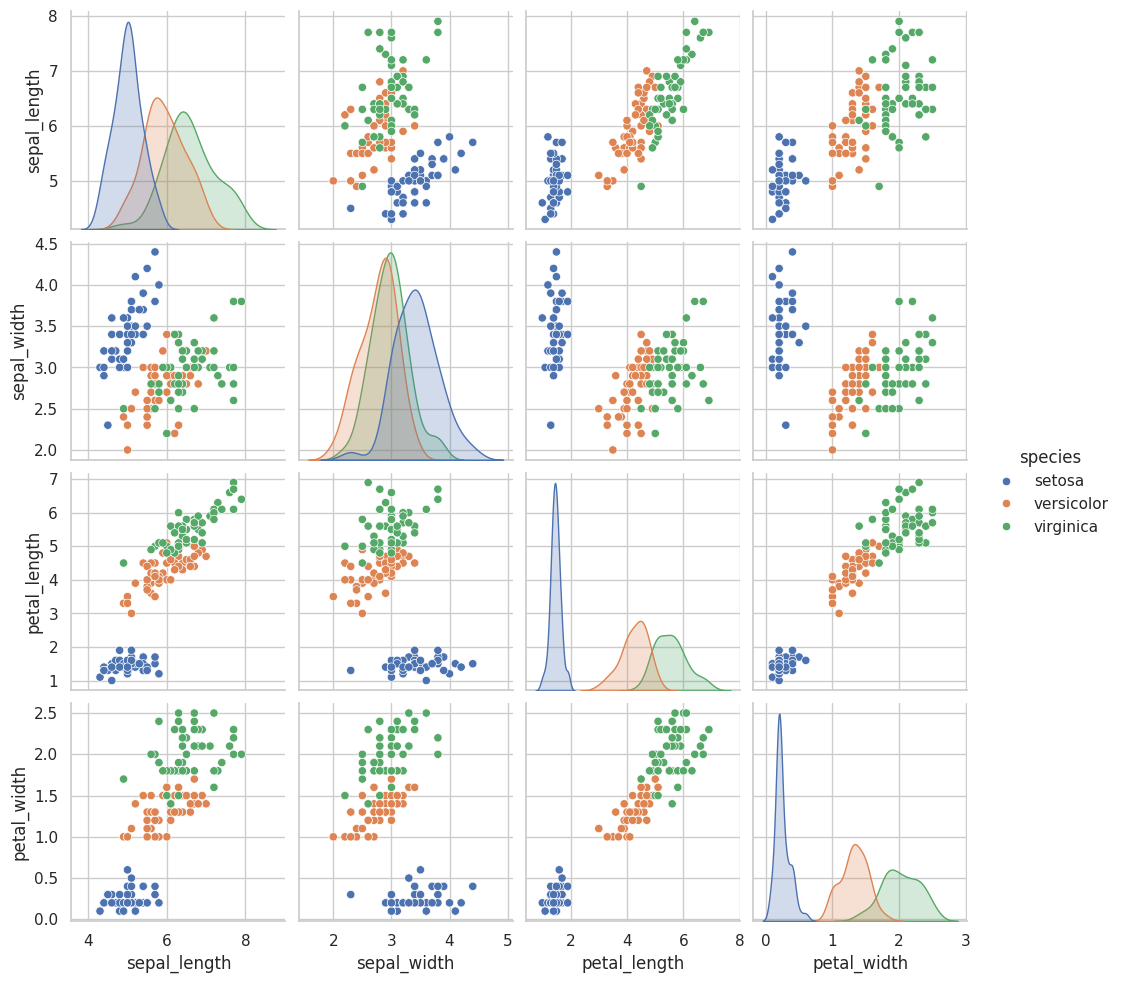

In [21]:
# MOST IMPORTANT FOR ML EDA
sns.pairplot(
    iris,
    hue="species"
)
plt.show()

# 8. MATRIX PLOTS (Correlation & Heatmaps)
## Use Case:
- Feature correlation
- Feature selection


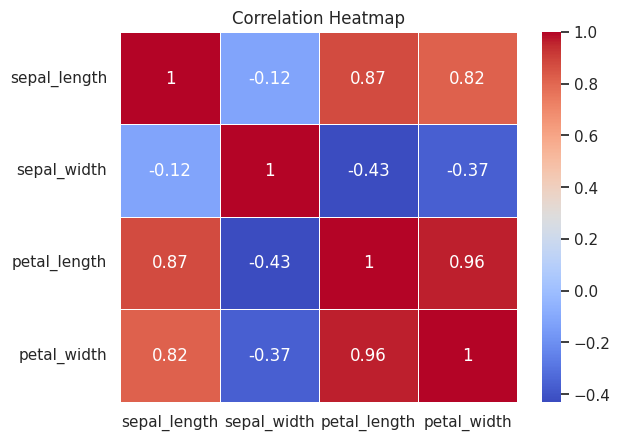

In [22]:
# Correlation matrix
corr_matrix = iris.drop(columns=["species"]).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()

# 9. REGRESSION PLOTS (VERY IMPORTANT FOR ML)

#### 9.1 Regression line with confidence interval


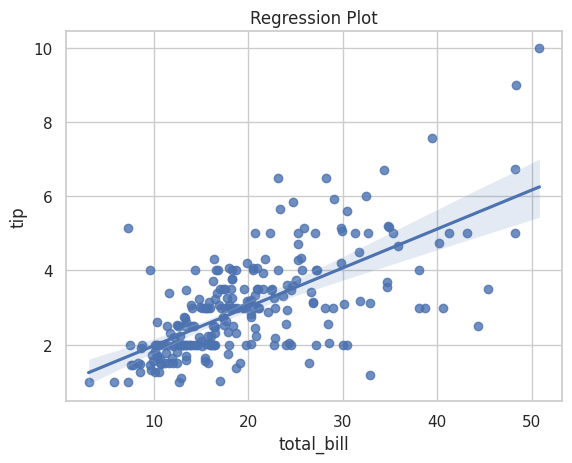

In [23]:
sns.regplot(
    data=tips,
    x="total_bill",
    y="tip"
)
plt.title("Regression Plot")
plt.show()




#### 9.2 lmplot (Regression + Faceting)


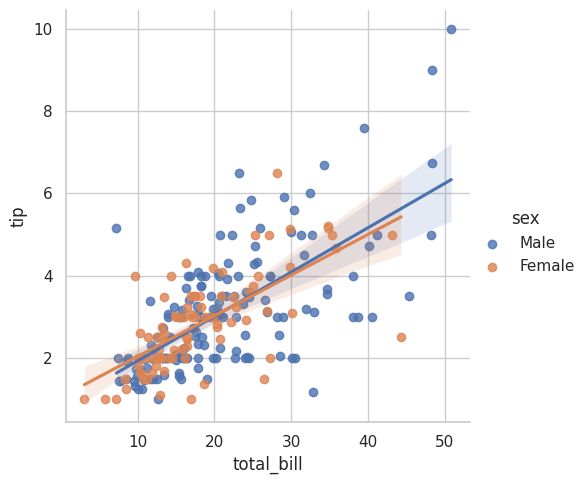

In [24]:
sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex"
)
plt.show()

# 10. FACET GRIDS (Multiple Plots by Category)
## Use Case:
- Compare patterns across categories

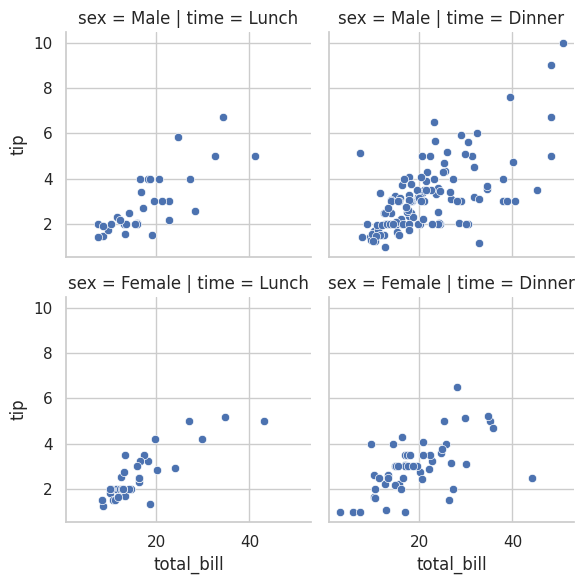

In [25]:
# FacetGrid with scatter
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()


# 11. STYLE, PALETTES & THEMES

In [26]:

# Change style
sns.set_style("darkgrid")


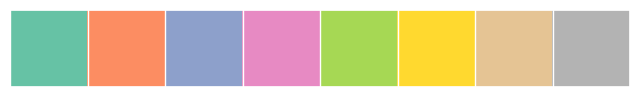

In [27]:
# Built-in color palettes
sns.palplot(sns.color_palette("Set2"))
plt.show()

In [28]:
# Custom palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]
sns.set_palette(custom_palette)


# 12. MULTI-PLOT FIGURES WITH MATPLOTLIB CONTROL

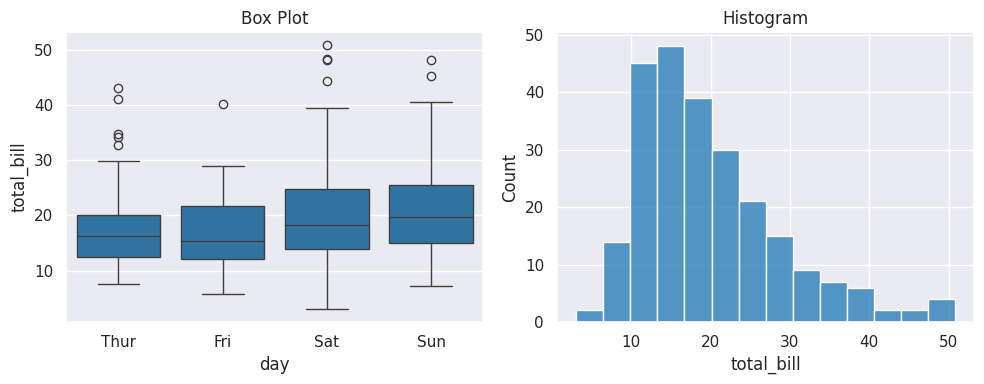

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0])
axes[0].set_title("Box Plot")

sns.histplot(data=tips, x="total_bill", ax=axes[1])
axes[1].set_title("Histogram")

plt.tight_layout()
plt.show()

# 13. COMMON EDA WORKFLOW IN ML (IMPORTANT SECTION)
#### Typical steps before model training:

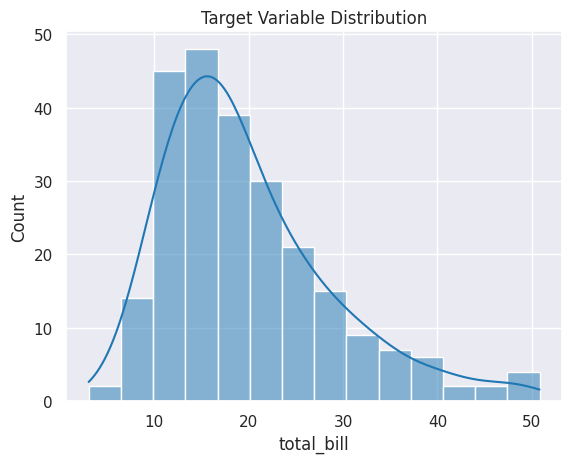

In [30]:
# 1. Check target distribution
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title("Target Variable Distribution")
plt.show()

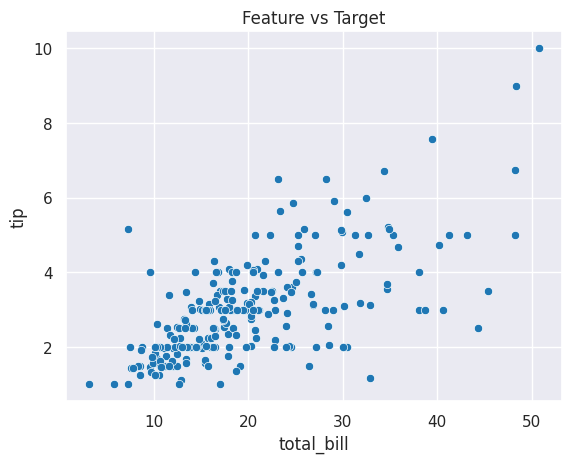

In [31]:
# 2. Feature vs Target
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Feature vs Target")
plt.show()

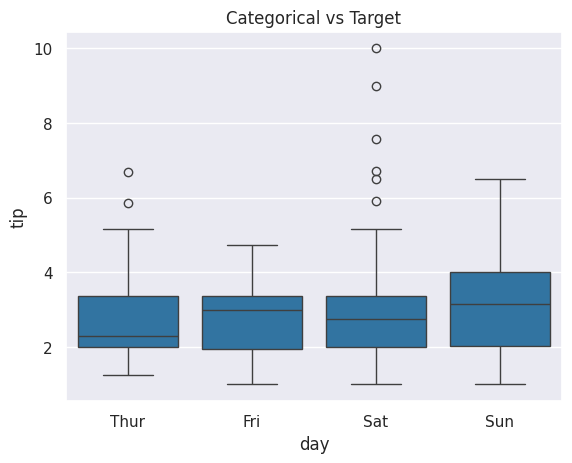

In [32]:
# 3. Categorical vs Target
sns.boxplot(data=tips, x="day", y="tip")
plt.title("Categorical vs Target")
plt.show()

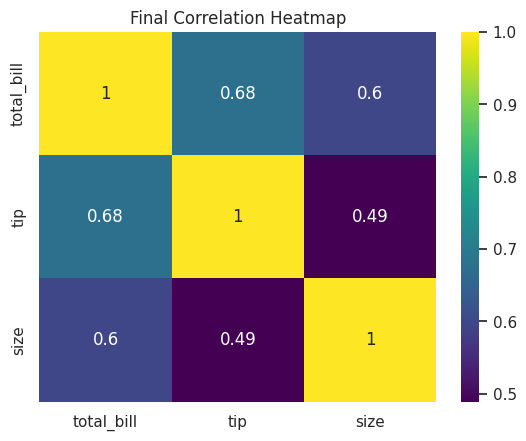

In [33]:
# 4. Correlation Heatmap
sns.heatmap(tips.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Final Correlation Heatmap")
plt.show()


# End of Seaborn Master Notebook
